In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import settings
import os
import matplotlib.pyplot as plt

(137, 137, 4)


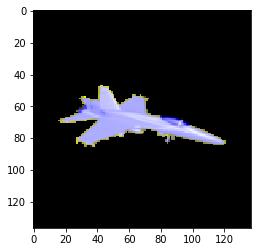

In [29]:
#load a sample image
image = os.path.join(settings.ROOT_DIR, 'data', 'sample', '03.png');
image = mpimg.imread(image);
print(image.shape)
image = np.reshape(image, (1, 137, 137 ,4))
plt.figure();
plt.imshow(image[0, :,:,1:4]);
plt.show()


In [9]:
## design tensorflow function which performs CNN encoding
def simple_encoder_layer(input_image):
    '''
    #input image should be a tensorflow tensor
    should accge,
      filters=32,
      kernel_size=[7,7],
      padding="same",
      activation=tf.nn.relu)    
    #add a maxpool
    pool7 = tf.layers.max_pooling2d(inputs=conv7, pool_size=[2, 2], strides=2)
ept an input 127x127 rgb image (W x H x C); #color channels should be last dim
    should ouput a dense representation or encoding
    '''

    conv7 = tf.layers.conv2d(
      inputs=input_image);
    pool7 = tf.layers.max_pooling2d(inputs=conv7, pool_size=[2, 2], strides=2)
    #use a for loop for the remaining 5 3x3 convs
    for i in range(5):
        conv3 = tf.layers.conv2d(
          inputs=pool7,
          filters=32,
          kernel_size=[3,3],
          padding="same",
          activation=tf.nn.relu)
        pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
        pool7 = pool3;
        
    #add in dense layer
    pool_flat = tf.contrib.layers.flatten(pool7)
    dense = tf.layers.dense(inputs=pool_flat, units=1024, activation=tf.nn.relu)
    
    #run this
    return dense;
    

(1, 127, 127, 3)
(1, 1024)


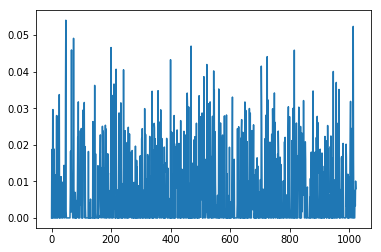

In [10]:
''' test encoder architecture'''

test_image = np.random.rand(1, 137, 137, 3)
print(test_image.shape)

x = tf.placeholder(tf.float32, shape = [None, 137, 137, 3])

test_out = simple_encoder_layer(x)

init = tf.global_variables_initializer();
sess = tf.Session();
sess.run(init);
out_image = sess.run(test_out, feed_dict={x: test_image})
print(out_image.shape)
plt.figure();
plt.plot(out_image[0])
plt.show()

In [11]:
'''
under what circumstances would you train an image deconvolver to begin with?
'''
def decoder(encoded_image):
    ''' for now, this takes in a FC output and deconvolves it, FC is 1024 dimensional'''
    #first it has to reshape it
    small_image = tf.reshape(encoded_image, shape = [-1, 16, 16, 4])
    Z1 = tf.layers.conv2d_transpose(
        small_image,
        filters = 32,
        kernel_size = (3,3))
    Zf = tf.layers.conv2d_transpose(
        Z1,
        filters = 32,
        kernel_size = (5,5))
    Zf = tf.layers.conv2d_transpose(
        Zf,
        filters = 3,
        kernel_size = (8,8))
    return Zf


(?, 1024)
<class 'tensorflow.python.framework.ops.Tensor'>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 29, 29, 3)
[[[-5.37768174e-05  4.02352089e-05 -6.24185777e-05]
  [ 1.26413361e-05  2.49495133e-06 -9.94099828e-05]
  [-4.80683404e-04  2.63022928e-04 -3.12470569e-04]
  ...
  [ 2.73127935e-05 -2.27889832e-04  1.52638415e-04]
  [-1.29892840e-04 -1.56855735e-04 -1.14656883e-04]
  [-1.94939475e-05 -2.80933509e-05  1.91372656e-05]]

 [[-3.51665134e-04  6.95939671e-05 -1.25832026e-04]
  [ 5.06071374e-04 -1.99726084e-04 -1.22964062e-04]
  [-2.25227064e-04 -2.24583666e-04  5.37201529e-04]
  ...
  [ 6.07059104e-04 -7.02523452e-04 -2.21037553e-04]
  [-8.93283504e-05 -7.71670020e-05 -3.32445430e-04]
  [ 5.32589620e-05  7.43815763e-05  1.35729661e-05]]

 [[-6.21951593e-04  3.54680611e-04 -3.15189973e-04]
  [ 7.17994873e-04 -8.91106392e-05 -2.84315727e-04]
  [-1.51365262e-03 -1.48818115e-04  5.20805188e-04]
  ...
  [-6.09770126e-04  8.89444258e-04 -1.20367645e-03]
  [-1.74709159e-04 -7.74128421e-05  9.82368801e-05]
  [-5.69537151e-05 -3.91683716e-05  6.53391762e-05]]

 ...

 [[ 4.58387338e-04 

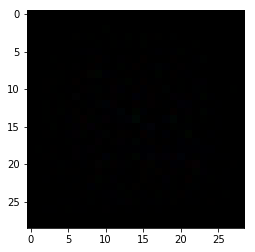

In [26]:
#test decoder with encoder output
x = tf.placeholder(tf.float32, shape = [None, 137, 137, 3])
encode = simple_encoder_layer(x)
print(encode.shape); print(type(encode))
test_out = decoder(encode)

init = tf.global_variables_initializer();
sess = tf.Session();
sess.run(init);
decoded = sess.run(test_out, feed_dict={x: image[:,:,:,0:3]})
print(decoded.shape)
plt.figure();
plt.imshow(decoded[0,:,:,:]); #just gibberish becuase we haven't trained anything
plt.show()